In [130]:
import numpy as np
import os
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [5]:
msd = pd.read_csv('../../../../Temp/MA/train_triplets.txt', sep='\t')

In [18]:
msd = msd.rename(columns={"b80344d063b5ccb3212f76538f3d9e43d87dca9e": "user_id", "SOAKIMP12A8C130995": "song_id", "1": "play_count"})

In [49]:
song_group = msd.groupby(['song_id'])["user_id"].count()

384546

In [50]:
filtered_songs = song_group[song_group > 1000]
len(filtered_songs)

8853

In [44]:
filtered_msd = msd[msd.song_id.isin(filtered_songs.index)]

In [47]:
user_group = filtered_msd.groupby(['user_id'])['song_id'].count()

In [55]:
filtered_users = user_group[user_group > 50]

In [64]:
msd_sample = filtered_msd[filtered_msd.user_id.isin(filtered_users.index)]
print(msd_sample.user_id.nunique())
print(msd_sample.song_id.nunique())
print(msd_sample['play_count'].count())

117966
8853
10439762


In [208]:
msd_sample = pd.read_csv('../../../../Temp/MA/msd_sample.csv',index_col=0)

/home/markush/anaconda3/envs/tensorflow/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [118]:
movies= pd.read_csv('../Data/MovieLens/ml-20m/movie_mapping.csv')
ratings = pd.read_csv('../Data/MovieLens/ml-latest-small/ratings.csv')
relevant_ratings = ratings.merge(movies, how='inner', on='movieId')
print(relevant_ratings['rating'].count())

96924


In [16]:
msd_sample.head()

,user_id,song_id,play_count
251,b64cdd1a0bd907e5e00b39e345194768e330d652,SOAFTRR12AF72A8D4D,3
252,b64cdd1a0bd907e5e00b39e345194768e330d652,SOALEQA12A58A77839,1
257,b64cdd1a0bd907e5e00b39e345194768e330d652,SOATNYF12AF72A8D48,3
258,b64cdd1a0bd907e5e00b39e345194768e330d652,SOBDKVR12A8C13E705,1
259,b64cdd1a0bd907e5e00b39e345194768e330d652,SOBDMNP12AF72AB1E1,2


In [38]:
songs = pd.DataFrame(msd_sample.msd_song_id.unique(), columns=['msd_song_id'])
songs.index.names = ['item_id']
users = pd.DataFrame(msd_sample.msd_user_id.unique(), columns=['msd_user_id'])
users.index.names = ['user_id']

In [27]:
songs.to_csv('../../../../Temp/MA/msd_song_mapping.csv')
users.to_csv('../../../../Temp/MA/msd_user_mapping.csv')

In [39]:
songs['song_id'] = songs.index
users['user_id'] = users.index

In [42]:
msd_sample = msd_sample.merge(songs, on='msd_song_id')
msd_sample = msd_sample.merge(users, on='msd_user_id')

In [44]:
msd_data = msd_sample[['user_id', 'song_id', 'play_count']]

In [49]:
msd_data.to_csv('../../../../Temp/MA/msd_data.csv')

In [106]:
tags = pd.read_csv('../../../../Temp/MA/lastfm_unique_tags.tsv', sep='\t', header=None, names =['tag','frequency'])

In [112]:
# tag_db = sqlite3.connect('../../../../Temp/MA/lastfm_tags.db')
# tag_df = pd.read_sql_query("SELECT ROWID as tag_id,tag FROM tags", tag_db)

,tag_id,tag
0,1,classic rock
1,2,Progressive rock
2,3,blues
3,4,memphis slim
4,5,pop
5,6,70s
6,7,Middle of the road
7,8,Bonjour ca va
8,9,Tony Levin
9,10,instrumental


In [108]:
relevant_tags = tag_df.merge(tags, on='tag').sort_values('frequency',ascending=False)
relevant_tags.set_index('tag_id')
relevant_tags = relevant_tags[:51]

In [109]:
tag_song_df = pd.read_sql_query(" select tag, val, tids.tid from tid_tag, tids where tid_tag.tid = tids.ROWID", tag_db)

In [112]:
tag_song_df = tag_song_df.merge(relevant_tags, how='inner', left_on='tag', right_index=True)
tag_song_df = tag_song_df[['tid', 'tag_id', 'val']]

In [61]:
features = features.pivot(index='tid', columns='tag_id', values='val')

In [64]:
features

tag_id,3,5,6,10,15,16,34,37,38,39,...,481,492,527,545,648,730,764,914,916,1177
tid,,,,,,,,,,,,,,,,,,,,,
TRAAAAK128F9318786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRAAABD128F429CF47,NaN,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRAAADJ128F4287B47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRAAAED128E0783FAB,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRAAAGF12903CEC202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRAAAGR128F425B14B,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
TRAAAIC128F14A5138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRAAAIR128F1480971,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,25.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRAAAJN128F428E437,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
tsd_to_track = pd.read_csv('../../../../Temp/MA/msdchallenge/taste_profile_song_to_tracks.txt', sep='\t', header=None, names =['msd','tid'])
track_to_id = pd.read_csv('../../../../Temp/MA/msd_song_mapping.csv')

In [70]:
print(tsd_to_track.head())
print(track_to_id.head())

                  msd                 tid
0  SOAAADD12AB018A9DD  TRNCENP12903C9EF3A
1  SOAAADE12A6D4F80CC  TRSKKFK128F148B615
2  SOAAADF12A8C13DF62  TRCQMSP128F428A6F7
3  SOAAADZ12A8C1334FB  TRMDNZY128F425A532
4  SOAAAFI12A6D4F9C66  TRZEXLQ128F1491D17
   item_id         msd_song_id
0        0  SOAFTRR12AF72A8D4D
1        1  SOALEQA12A58A77839
2        2  SOATNYF12AF72A8D48
3        3  SOBDKVR12A8C13E705
4        4  SOBDMNP12AF72AB1E1


In [188]:
mapping = track_to_id.merge(tsd_to_track, how='inner',  left_on='msd_song_id', right_on='msd')

In [189]:
mapping.count()

item_id        8853
msd_song_id    8853
msd            8853
tid            8790
dtype: int64

In [190]:
mapping = mapping[mapping.tid.isna() == False]
mapping = mapping[mapping.tid.isin(tag_song_df.tid.unique())].reset_index()
mapping = mapping[['msd_song_id', 'tid']]
mapping.index.names = ['item_id']

In [192]:
mapping.to_csv('../../../../Temp/MA/msd_song_mapping.csv')
mapping.head()

,msd_song_id,tid
item_id,,
0,SOAFTRR12AF72A8D4D,TRCWHIO128F1488FB7
1,SOALEQA12A58A77839,TRCWNZW128F427D0E0
2,SOATNYF12AF72A8D48,TRNJLKP128F427CE28
3,SOBDKVR12A8C13E705,TRZACEN128F428E742
4,SOBDMNP12AF72AB1E1,TRGASNY128F14696B0


In [203]:
mapping['item_id'] = mapping.index
selected_tag_songs = tag_song_df.merge(mapping, on='tid', how='inner')
selected_tag_songs.val = selected_tag_songs.val / 100

In [205]:
song_features = pd.pivot_table(selected_tag_songs, values='val', index=['item_id'], columns=['tag_id'], fill_value=0).to_numpy()

In [242]:
msd_sample = pd.read_csv('../../../../Temp/MA/msd_sample.csv')

In [210]:
user_mapping = pd.read_csv('../../../../Temp/MA/msd_user_mapping.csv')

In [244]:
msd_sample = msd_sample.merge(user_mapping, left_on='user_id', right_on='msd_user_id')

In [245]:
msd_sample = msd_sample.merge(mapping, left_on='song_id', right_on='msd_song_id')

In [246]:
msd_sample = msd_sample[['user_id_y', 'item_id', 'play_count']]
msd_sample = msd_sample.rename(columns = {'user_id_y': 'user_id'})

In [259]:
print(len(msd_sample))
print(msd_sample.user_id.nunique())
print(msd_sample.item_id.nunique())

8173800
117966
6712


In [260]:
msd_sample.to_csv('../../../../Temp/MA/msd_data.csv')

In [270]:
nr_users = msd_sample.user_id.nunique()
frequencies = msd_sample.pivot_table(values='user_id', index='item_id', aggfunc='count',fill_value=0) / nr_users

In [274]:
frequencies.to_numpy()

array([[0.09221301],
       [0.01825102],
       [0.01772545],
       ...,
       [0.0016615 ],
       [0.00090704],
       [0.00159368]])

In [277]:
np.savez(os.path.abspath('../../../../Temp/MA/song_features.npz'), features = song_features, known_frequency=frequencies)

In [278]:
song_features.shape

(6712, 41)

In [279]:
frequencies.shape

(6712, 1)

In [283]:
np.sort(selected_tag_songs.tag_id.unique())

array([   3,    6,   10,   15,   16,   34,   37,   38,   39,   40,   41,
         42,   70,   75,   95,   96,   97,   98,  138,  150,  151,  196,
        201,  230,  238,  269,  322,  324,  379,  380,  382,  481,  492,
        527,  545,  648,  730,  764,  914,  916, 1177])

In [290]:
relevant_tags[relevant_tags.tag_id.isin(selected_tag_songs.tag_id.unique())]

,tag_id,tag,frequency
94,95,rock,101071
95,96,alternative,55777
37,38,indie,48175
137,138,electronic,46270
69,70,female vocalists,42565
97,98,favorites,39921
237,238,Love,34901
321,322,00s,31432
647,648,alternative rock,30334
33,34,beautiful,29421


In [320]:
def convert_to_implicit(play_count):
    return True


def group_and_transform(ratings):
    ratings = ratings[['user_id', 'item_id', 'play_count']]
    pd_values = ratings.sort_values('user_id').values.T
    user_indices = pd_values[0]
    values = np.dstack((pd_values[1], pd_values[2]))[0]
    ukeys, index = np.unique(user_indices, True)
    arrays = np.split(values, index[1:])
    df = pd.DataFrame({'userId': ukeys, 'rated': arrays})
    df['positive'] = df['rated'].map(lambda x: [y[0] for y in x if convert_to_implicit(y[1])])
    return df

def augment_negative_sampling(rated, max_item, negative_sampling_rate = 1.5):
    nr_rated = len(rated)
    sample = np.random.randint(0, max_item, size=int(nr_rated * negative_sampling_rate)).tolist()
    return sample + rated

In [314]:
tmp =group_and_transform(msd_sample)

In [321]:
nr_items = 6712
tmp['rated'] = tmp['rated'].map(lambda x: augment_negative_sampling([y[0] for y in x], nr_items))

In [328]:
np.sort(tmp.loc[35].rated)

array([  38,   40,   62,  107,  132,  158,  159,  389,  416,  498,  636,
        641,  668,  684,  685,  697,  702,  710,  767,  797,  819,  887,
        970,  973, 1001, 1178, 1184, 1187, 1242, 1380, 1396, 1413, 1421,
       1432, 1470, 1475, 1475, 1532, 1705, 1820, 2019, 2022, 2028, 2030,
       2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062,
       2063, 2064, 2065, 2066, 2067, 2068, 2068, 2069, 2070, 2071, 2072,
       2073, 2074, 2435, 2475, 2616, 2781, 2830, 2845, 2866, 2892, 3105,
       3417, 3534, 3808, 3951, 4038, 4182, 4347, 4398, 4447, 4476, 4491,
       4546, 4605, 4674, 4953, 4979, 4999, 5011, 5072, 5200, 5222, 5292,
       5320, 5453, 5536, 5595, 5695, 5941, 6006, 6011, 6060, 6069, 6229,
       6364, 6463])

In [329]:
np.sort(tmp.loc[35].positive)

array([ 158,  159,  636,  668,  684,  685,  697,  702,  710,  767,  819,
        887,  970, 1187, 1413, 1421, 1432, 1470, 1475, 1705, 2019, 2028,
       2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062,
       2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073,
       2074])

In [331]:
msd_sample.count()

user_id       8173800
item_id       8173800
play_count    8173800
dtype: int64

In [6]:
genome_relevance_csv = pd.read_csv(os.path.abspath('../Data/MovieLens/ml-20m/genome-scores.csv'))

In [113]:
loaded =  np.load('../Data/msd/song_features.npz', allow_pickle=True)

In [114]:
features = loaded['features']

In [122]:
features.shape

(6712, 41)

In [124]:
nr_items = features.shape[0]
results = list()
for i in range(0, nr_items):
    for j in range(0, nr_items):
        if i != j:
            tmp = 1 -(evaluation.Evaluation.cosine_similarity(features[i], features[j]) + 1) / 2
            results.append(tmp)
    print('\r %5.3f.' % (i / nr_items) , end='\r')
np.mean(results)
print()

KeyboardInterrupt: 

In [125]:
print(np.std(results))
print(np.mean(results))

0.15947052643267212
0.3589560098571809


In [126]:
frequency = loaded['known_frequency']

In [127]:
print(np.mean(frequency[:,0]))
np.std(frequency[:,0])

0.010323220542910317


0.013278745979905547

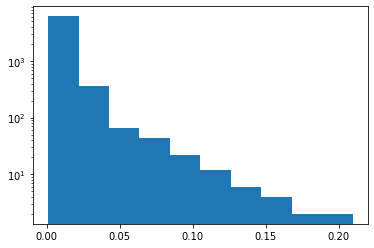

In [137]:
plt.hist(frequency[:,0], log=True)
plt.savefig("../Graphics/histogram_msd_popularity.pdf")